In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm
from sympy import *
init_printing(use_latex='mathjax')

**Action Plan**

* ~~Get walk score of low-income neighborhoods and it's surroundings. Likewise for wealthy neighborhoods and put this information into a bell curve~~
    * ~~possibly get percentile rankings of walk scores in ow income neighborhoods and then wealth neighborhoods and then put them into one graph with 2 bell curves~~
    * figure out how to construct the average park size graph from scratch 

* Somehow use the annotated map from social explorer
    * Get demographic data
    * Get income data
    * Get whatever data that's relevant

* ~~Get relative location of interviewee in Park Serve, particularly in Rosedale, Queens~~
    * ~~Mostly for second research question~~
* Get more data for second research question
* Somehow tie in research articles with your findings
* Don't forget to use PolicyMapper
* ~~Look into putting percentiles on the bellcurve of White neighborhoods~~
* ~~Use ArcMap Online to get Park Score data~~
* Look into creating a sankey diagram

### Walk Score for all NYC neighborhoods

In [3]:
a = np.array([100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,97,97,97,97,
97,97,97,97,97,97,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,93,93,
93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,91,91,91,91,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,88,88,88,
88,88,88,88,88,88,88,87,86,85,85,84,84,84,84,84,84,83,83,83,83,83,82,82,82,82,82,82,81,81,81,80,79,79,79,79,79,79,79,78,
78,77,77,77,77,77,77,76,76,76,76,75,75,75,75,75,74,74,74,74,74,73,73,72,72,72,71,71,71,71,71,70,70,70,70,68,68,68,67,67,
66,66,66,66,66,65,65,65,65,64,64,64,63,63,63,63,62,61,61,59,59,58,57,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,
44,44,41,40,39,39,38,37,35,27,4,])
a

array([100, 100, 100, 100, 100, 100, 100, 100, 100,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,
        98,  98,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  96,
        96,  96,  96,  96,  96,  96,  96,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  94,  94,  94,
        94,  94,  94,  94,  94,  93,  93,  93,  93,  93,  93,  93,  93,
        93,  93,  93,  93,  92,  92,  92,  92,  92,  92,  92,  91,  91,
        91,  91,  90,  90,  90,  90,  90,  90,  90,  90,  89,  89,  89,
        89,  89,  89,  89,  89,  88,  88,  88,  88,  88,  88,  88,  88,
        88,  88,  87,  86,  85,  85,  84,  84,  84,  84,  84,  84,  83,
        83,  83,  83,  83,  82,  82,  82,  82,  82,  82,  81,  81,  81,
        80,  79,  79,  79,  79,  79,  79,  79,  78,  78,  77,  77,  77,
        77,  77,  77,  76,  76,  76,  76,  75,  75,  75,  75,  75,  74,
        74,  74,  74,  74,  73,  73,  72,  72,  72,  71,  71,  7

In [4]:
13*19-4

243

In [4]:
mu = np.mean(a)
sigma = np.std(a)
x1 = 100
x2 = 100
mu, sigma

(80.59670781893004, 17.153923997240618)

In [14]:
z1 = (x1 - mu)/sigma #Standardizing
z2 = (x2 - mu)/sigma

z1,z2

(1.1311284918944011, 1.1311284918944011)

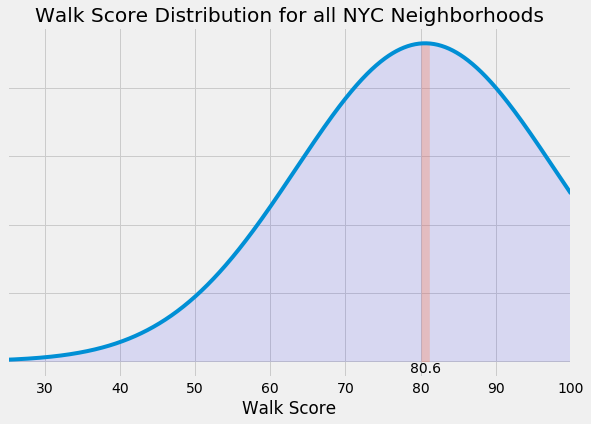

The Walk Score for all NYC neighborhoods is 80.59670781893004 with a standard deviation of 17.153923997240618 and an error of 1.1004247374961391


In [13]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX DO NOT RUN XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .5, mu_a + .5) 
y2 = norm.pdf(x1,mu_a,sigma_a)

#Plot the mafucker
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_a), xy=(mu_a, 0), ha='center', va='top') 
ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.set_xlim([25,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for all NYC Neighborhoods')

plt.savefig('Walk Score Distribution for NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for all NYC neighborhoods is", mu_a,
      "with a standard deviation of", sigma_a,
      "and an error of", Err_a)

### Walk Score for Low income neighborhoods

In [3]:
l = np.array([96,96,95,95,95,95,94,94,94,94,93,93,93,92,92,90,89,89,89,88,88,85,83,77,71])
l

array([96, 96, 95, 95, 95, 95, 94, 94, 94, 94, 93, 93, 93, 92, 92, 90, 89,
       89, 89, 88, 88, 85, 83, 77, 71])

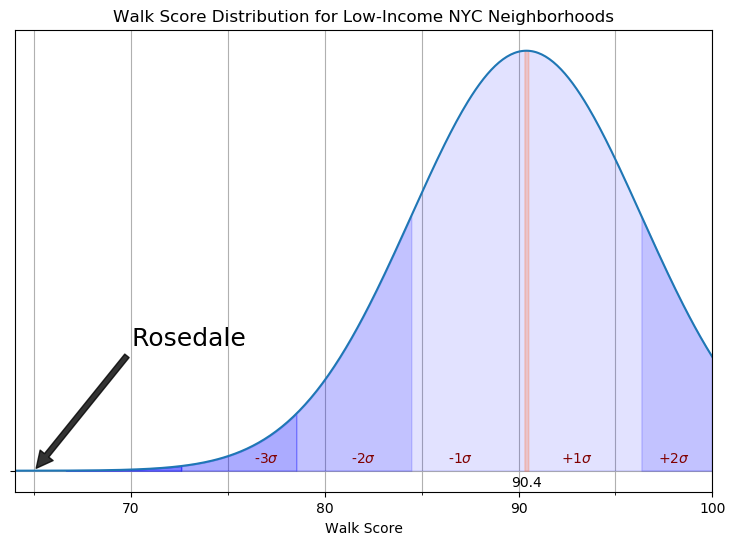

The Walk Score for Low-Income NYC neighborhoods is 90.40 with a standard deviation of 5.94 and an error of 1.19


In [25]:
mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .1, mu_l + .1) 
#x1 = np.linspace(mu_l - Err_l, mu_l + Err_l)
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax.annotate('Rosedale',
            xy = (65,0), 
            xytext = (70,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([64,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Low-Income NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Low-Income NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Low-Income NYC neighborhoods is", 
      "{:.2f}".format(round(mu_l,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_l,2)),
      "and an error of",
      "{:.2f}".format(round(Err_l,2))
     )

In [25]:
A = (90.4 - 65)/sigma_l

print("Rosedale is",
      "{:.0f}".format(round(A,0)), 
      "standard deviations away from the mean")

Rosedale is 4 standard deviations away from the mean


### Walk Score for Black Neighborhoods

In [6]:
b = np.array([97,97,97,97,96,95,94,93,90,90,89,88,88,88,88,87,84,84,84,82,81,81,79,79,78,77,76,76,75,75,74,74,73,71,70,
              70,68,68,66,65,61,27,])
b

array([97, 97, 97, 97, 96, 95, 94, 93, 90, 90, 89, 88, 88, 88, 88, 87, 84,
       84, 84, 82, 81, 81, 79, 79, 78, 77, 76, 76, 75, 75, 74, 74, 73, 71,
       70, 70, 68, 68, 66, 65, 61, 27])

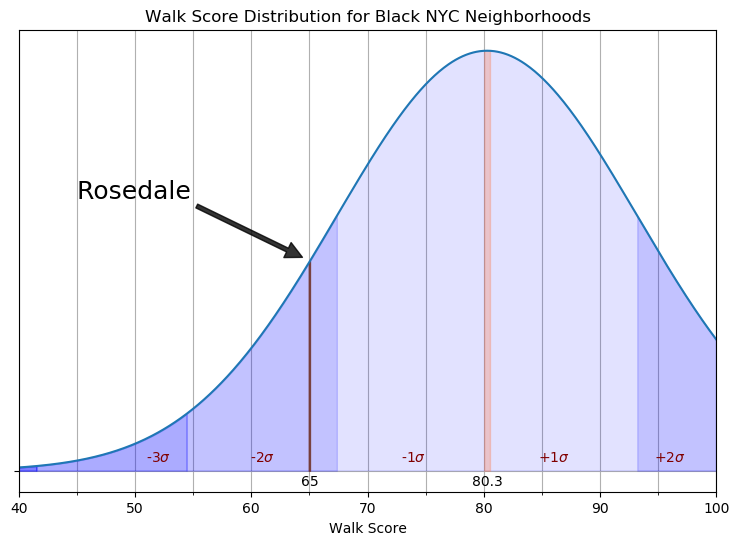

The Walk Score for Black NYC neighborhoods is 80.29 with a standard deviation of 12.93 and an error of 1.99


In [26]:
mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .25, mu_b + .25) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate('Rosedale',
            xy = (64.6,0.0156), #streamline the y prt 
            xytext = (45,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.set_xlim([40,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Black NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Black NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Black NYC neighborhoods is", 
      "{:.2f}".format(round(mu_b,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_b,2)),
      "and an error of",
      "{:.2f}".format(round(Err_b,2))
     )

### Walk Score for White Neighborhoods

In [3]:
W = np.array([100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,97,97,97,97,97,97,97,
96,96,96,96,95,95,95,95,95,95,95,95,94,93,93,93,93,93,93,93,93,92,91,91,91,90,90,90,90,90,89,89,89,88,88,88,86,85,84,
84,83,83,82,82,82,82,80,79,79,79,79,77,77,77,77,75,75,74,74,72,72,72,71,71,71,70,70,70,68,67,67,66,66,66,65,65,65,64,
64,64,63,63,63,63,62,61,59,59,58,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,44,44,41,40,39,39,38,37,35,4,])
W

array([100, 100, 100, 100, 100, 100, 100,  99,  99,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,  98,  97,
        97,  97,  97,  97,  97,  97,  96,  96,  96,  96,  95,  95,  95,
        95,  95,  95,  95,  95,  94,  93,  93,  93,  93,  93,  93,  93,
        93,  92,  91,  91,  91,  90,  90,  90,  90,  90,  89,  89,  89,
        88,  88,  88,  86,  85,  84,  84,  83,  83,  82,  82,  82,  82,
        80,  79,  79,  79,  79,  77,  77,  77,  77,  75,  75,  74,  74,
        72,  72,  72,  71,  71,  71,  70,  70,  70,  68,  67,  67,  66,
        66,  66,  65,  65,  65,  64,  64,  64,  63,  63,  63,  63,  62,
        61,  59,  59,  58,  57,  57,  56,  55,  55,  54,  54,  54,  53,
        52,  52,  51,  50,  50,  49,  48,  46,  44,  44,  41,  40,  39,
        39,  38,  37,  35,   4])

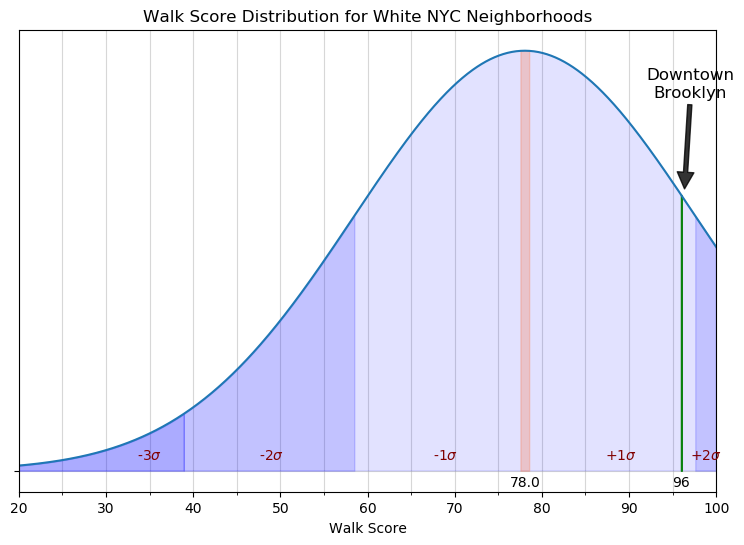

The Walk Score for White NYC neighborhoods is 78.04 with a standard deviation of 19.56 and an error of 1.61


In [4]:
mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
#dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_W), xy=(mu_W, -.00025), ha='center', va='top') 
ax.annotate("96", xy=(96,-.00025), ha='center', va='top')
ax.annotate('Downtown\nBrooklyn',
            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
            xytext = (97,0.0180), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([20,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for White NYC Neighborhoods')


#plt.savefig('Walk Score Distribution for White NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for White NYC neighborhoods is", 
      "{:.2f}".format(round(mu_W,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_W,2)),
      "and an error of",
      "{:.2f}".format(round(Err_W,2))
     )

### Walk Score for Latino naighborhoods

In [42]:
H = np.array([97,96,96,96,96,95,95,95,95,95,95,95,94,94,94,94,94,94,93,93,93,93,92,92,92,92,92,92,91,90,90,90,89,89,
88,88,88,88,88,88,85,84,83,83,82,81,79,77,75,73,71,27,4])
H

array([97, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94,
       94, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 91, 90, 90, 90, 89, 89,
       88, 88, 88, 88, 88, 88, 85, 84, 83, 83, 82, 81, 79, 77, 75, 73, 71,
       27,  4])

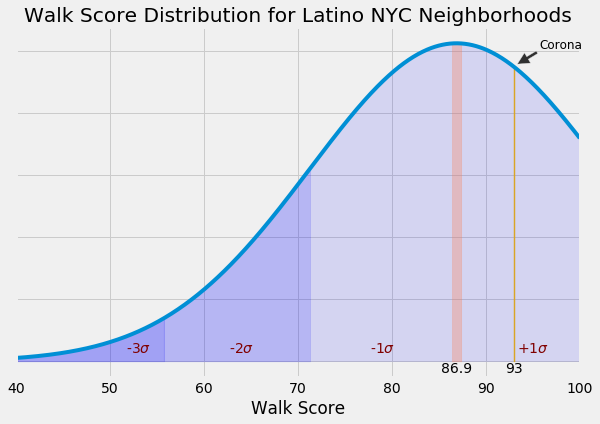

The Walk Score for Latino NYC neighborhoods is 86.89 with a standard deviation of 15.58 and an error of 2.14


In [12]:
mu_H = np.mean(H)
sigma_H = np.std(H)
Err_H = sigma_H/(np.sqrt(np.count_nonzero(H)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_H,sigma_H)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_H - .5, mu_H + .5) 
y2 = norm.pdf(x1,mu_H,sigma_H)

# dist(+/-) the walkscore
x2 = np.linspace(93-.05, 93+.05)
y3 = norm.pdf(x2,mu_H,sigma_H)
cor = norm(mu_H,sigma_H).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_H - sigma_H, mu_H + sigma_H)
yoms = norm.pdf(xoms,mu_H,sigma_H)

# 2 std left of mean
xtsdl = np.linspace(mu_H - 2 * sigma_H, mu_H - 1*sigma_H)
ytsdl = norm.pdf(xtsdl, mu_H, sigma_H)

# 2 std right of mean
xtsdr = np.linspace(mu_H + 2 * sigma_H, mu_H + 1*sigma_H)
ytsdr = norm.pdf(xtsdr, mu_H, sigma_H)

# 3 std left of mean
xhsdl = np.linspace(mu_H - 3 * sigma_H, mu_H - 2*sigma_H)
yhsdl = norm.pdf(xhsdl, mu_H, sigma_H)

# 4std left of mean
xfsdl = np.linspace(mu_H - 4 * sigma_H, mu_H - 3*sigma_H)
yfsdl = norm.pdf(xfsdl, mu_H, sigma_H)

# Plot the mafucker
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_H), xy=(mu_H, 0), ha='center', va='top') 
ax.annotate("93", xy=(93,0), ha='center', va='top')
ax.annotate('Corona',
            xy = (93.3,0.0239), #streamline the y prt. arrays don't work here 
            xytext = (98,0.025), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(79,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(64,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(95,0.0005), ha='center', va='bottom', color='maroon')

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.fill_between(x2, y3,0, alpha = 1, color = 'goldenrod') #Corona

ax.set_xlim([40,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Latino NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Latino NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Latino NYC neighborhoods is", 
      "{:.2f}".format(round(mu_H,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_H,2)),
      "and an error of",
      "{:.2f}".format(round(Err_H,2))
     )

### Walk Score for Asian neighborhoods

In [38]:
A = np.array([96,95,89,89,84,84,83,82,79,79,78,76,76,74,57,52])
A

array([96, 95, 89, 89, 84, 84, 83, 82, 79, 79, 78, 76, 76, 74, 57, 52])

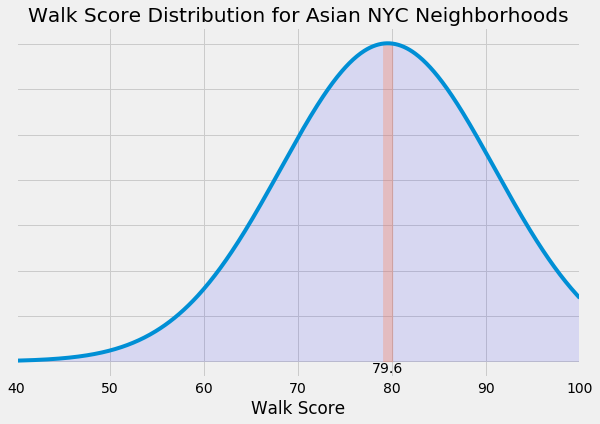

The Walk Score for Asian NYC neighborhoods is 79.5625 with a standard deviation of 11.379635044675203 and an error of 2.8449087611688006


In [12]:
mu_A = np.mean(A)
sigma_A = np.std(A)
Err_A = sigma_A/(np.sqrt(np.count_nonzero(A)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_A,sigma_A)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_A - .5, mu_A + .5) 
y2 = norm.pdf(x1,mu_A,sigma_A)

# dist(+/-) the walkscore
x2 = np.linspace(93-.05, 93+.05)
y3 = norm.pdf(x2,mu_H,sigma_H)

#Plot the mafucker
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_A), xy=(mu_A, 0), ha='center', va='top') 
ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.set_xlim([40,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Asian NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Asian NYC neighborhoods is", mu_A,"with a standard deviation of", sigma_A,
      "and an error of", Err_A)

### Walk Score for Minority neighborhoods

In [13]:
M = np.array([97,97,97,97,97,96,96,96,96,96,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,93,93,93,93,93,92,92,92,
92,92,92,91,90,90,90,90,90,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,87,85,84,84,84,84,83,83,83,82,82,82,81,81,81,
79,79,79,78,78,77,77,76,76,76,75,75,75,74,74,74,73,73,71,71,70,70,68,68,66,65,61,57,52,27,4])
M

array([97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95,
       95, 95, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 92, 92, 92,
       92, 92, 92, 91, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 88, 88, 88,
       88, 88, 88, 88, 88, 88, 88, 87, 85, 84, 84, 84, 84, 83, 83, 83, 82,
       82, 82, 81, 81, 81, 79, 79, 79, 78, 78, 77, 77, 76, 76, 76, 75, 75,
       75, 74, 74, 74, 73, 73, 71, 71, 70, 70, 68, 68, 66, 65, 61, 57, 52,
       27,  4])

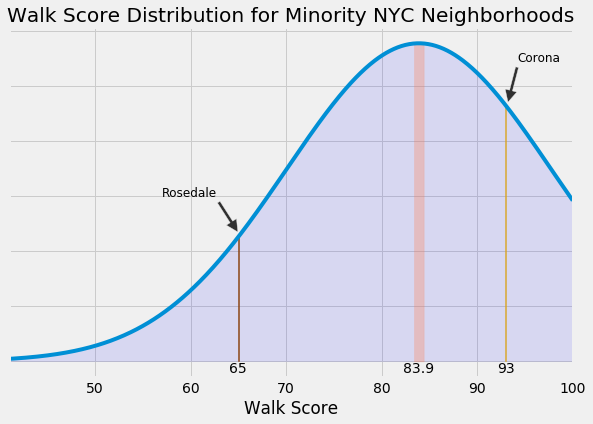

The Walk Score for minority NYC neighborhoods is 83.89 with a standard deviation of 13.79 and an error of 1.35


In [99]:
mu_M = np.mean(M)
sigma_M = np.std(M)
Err_M = sigma_M/(np.sqrt(np.count_nonzero(M)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_M,sigma_M)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_M - .5, mu_M + .5) 
y2 = norm.pdf(x1,mu_M,sigma_M)

# dist(+/-) the walkscore
xC = np.linspace(93 - .05, 93 + .05)
xR = np.linspace(65 - .05, 65 + .05)
cor = norm(mu_M,sigma_M).pdf(93)
ros = norm(mu_M,sigma_M).pdf(65)

# plotting percentile shading
xoms = np.linspace(mu_M - sigma_M, mu_M + sigma_M)
yoms = norm.pdf(xoms,mu_M,sigma_M)

# 2 std left of mean
xtsdl = np.linspace(mu_M - 2 * sigma_M, mu_M - 1*sigma_M)
ytsdl = norm.pdf(xtsdl, mu_M, sigma_M)

# 2 std right of mean
xtsdr = np.linspace(mu_M + 2 * sigma_M, mu_M + 1*sigma_M)
ytsdr = norm.pdf(xtsdr, mu_M, sigma_M)

# 3 std left of mean
xhsdl = np.linspace(mu_M - 3 * sigma_M, mu_M - 2*sigma_M)
yhsdl = norm.pdf(xhsdl, mu_M, sigma_M)

# 4std left of mean
xfsdl = np.linspace(mu_M - 4 * sigma_M, mu_M - 3*sigma_M)
yfsdl = norm.pdf(xfsdl, mu_M, sigma_M)

# Plot the mafucker
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_M), xy=(mu_M, 0), ha='center', va='top')
ax.annotate("65", xy=(65,0), ha='center', va='top')
ax.annotate("93", xy=(93,0), ha='center', va='top')
ax.annotate('Corona',
            xy = (93.2,0.0235), 
            xytext = (96.5,0.027), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )
ax.annotate('Rosedale',
            xy = (65,0.0117), #streamline the y prt 
            xytext = (57,0.015), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
           )

# Annotate 1,2,3 STD +/- the mean
#ax.annotate("-1$\sigma$", xy=(77,0.0005), ha='center', va='bottom', color='maroon')
#ax.annotate("-2$\sigma$", xy=(63,0.0005), ha='center', va='bottom', color='maroon')
#ax.annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
#ax.annotate("+1$\sigma$", xy=(90,0.0005), ha='center', va='bottom', color='maroon')
#ax.annotate("+2$\sigma$", xy=(97.5,0.0005), ha='left', va='bottom', color='maroon')

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
#ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
#ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
#ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
#ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
#ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.fill_between(xC, cor, 0, alpha = .9, color = 'goldenrod') #Corona
ax.fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown') #Rosedale 

ax.set_xlim([41,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Minority NYC Neighborhoods')

# REDARY TO SAVE - DELETE THIS AFTER SAVING
#plt.savefig('Walk Score Distribution for Minority NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for minority NYC neighborhoods is", 
      "{:.2f}".format(round(mu_M,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_M,2)),
      "and an error of",
      "{:.2f}".format(round(Err_M,2))
     )

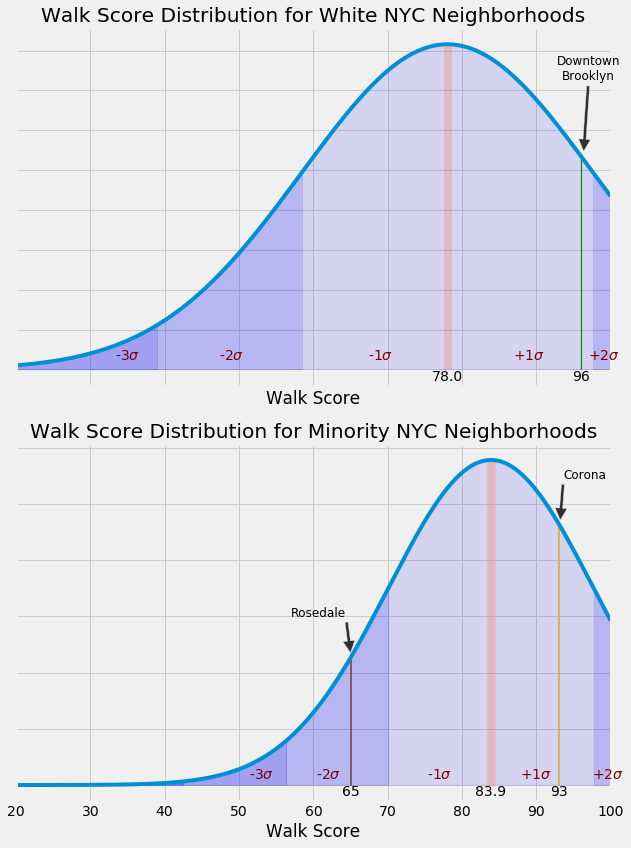

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (9,12))

mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
#dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
plt.style.use('fivethirtyeight')
ax[0].plot(x,y)

ax[0].annotate("{:.1f}".format(mu_W), xy=(mu_W, 0), ha='center', va='top') 
ax[0].annotate("96", xy=(96,0), ha='center', va='top')
ax[0].annotate('Downtown\nBrooklyn',
            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
            xytext = (97,0.0180), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax[0].annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax[0].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0].fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax[0].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[0].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[0].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[0].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[0].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[0].set_xlim([20,100])
ax[0].set_xlabel('Walk Score')
ax[0].set_yticklabels([])
ax[0].set_title('Walk Score Distribution for White NYC Neighborhoods')


############################################# MINORITY NEIGHBORHOODS ################################################
mu_M = np.mean(M)
sigma_M = np.std(M)
Err_M = sigma_M/(np.sqrt(np.count_nonzero(M)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_M,sigma_M)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_M - .5, mu_M + .5) 
y2 = norm.pdf(x1,mu_M,sigma_M)

# dist(+/-) the walkscore
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .07, 65 + .07)
cor = norm(mu_M,sigma_M).pdf(93)
ros = norm(mu_M,sigma_M).pdf(65)

# plotting percentile shading
xoms = np.linspace(mu_M - sigma_M, mu_M + sigma_M)
yoms = norm.pdf(xoms,mu_M,sigma_M)

# 2 std left of mean
xtsdl = np.linspace(mu_M - 2 * sigma_M, mu_M - 1*sigma_M)
ytsdl = norm.pdf(xtsdl, mu_M, sigma_M)

# 2 std right of mean
xtsdr = np.linspace(mu_M + 2 * sigma_M, mu_M + 1*sigma_M)
ytsdr = norm.pdf(xtsdr, mu_M, sigma_M)

# 3 std left of mean
xhsdl = np.linspace(mu_M - 3 * sigma_M, mu_M - 2*sigma_M)
yhsdl = norm.pdf(xhsdl, mu_M, sigma_M)

# 4std left of mean
xfsdl = np.linspace(mu_M - 4 * sigma_M, mu_M - 3*sigma_M)
yfsdl = norm.pdf(xfsdl, mu_M, sigma_M)

# Plot the mafucker
plt.style.use('fivethirtyeight')
ax[1].plot(x,y)

ax[1].annotate("{:.1f}".format(mu_M), xy=(mu_M, 0), ha='center', va='top')
ax[1].annotate("65", xy=(65,0), ha='center', va='top')
ax[1].annotate("93", xy=(93,0), ha='center', va='top')
ax[1].annotate('Corona',
            xy = (93.2,0.0235), 
            xytext = (96.5,0.027), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )
ax[1].annotate('Rosedale',
            xy = (65,0.0117), #streamline the y prt 
            xytext = (57,0.015), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
           )
ax[1].annotate("-1$\sigma$", xy=(77,0.0003), ha='center', va='bottom', color='maroon')
ax[1].annotate("-2$\sigma$", xy=(62,0.0003), ha='center', va='bottom', color='maroon')
ax[1].annotate("-3$\sigma$", xy=(53,0.0003), ha='center', va='bottom', color='maroon')
ax[1].annotate("+1$\sigma$", xy=(90,0.0003), ha='center', va='bottom', color='maroon')
ax[1].annotate("+2$\sigma$", xy=(97.5,0.0003), ha='left', va='bottom', color='maroon')

ax[1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1].fill_between(xC, cor, 0, alpha = .9, color = 'goldenrod') #Corona
ax[1].fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown') #Rosedale 
ax[1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[1].set_xlim([20,100])
ax[1].set_yticklabels([])
ax[1].set_xlabel("Walk Score")
ax[1].set_title('Walk Score Distribution for Minority NYC Neighborhoods')

plt.subplots_adjust(hspace=0)
plt.tight_layout()
#plt.savefig('Walk Score Distribution for White and Minority NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

## Walk Score for Wealthy neighborhoods

In [6]:
R = np.array([100,99,99,99,97,96,95,91])
R

array([100,  99,  99,  99,  97,  96,  95,  91])

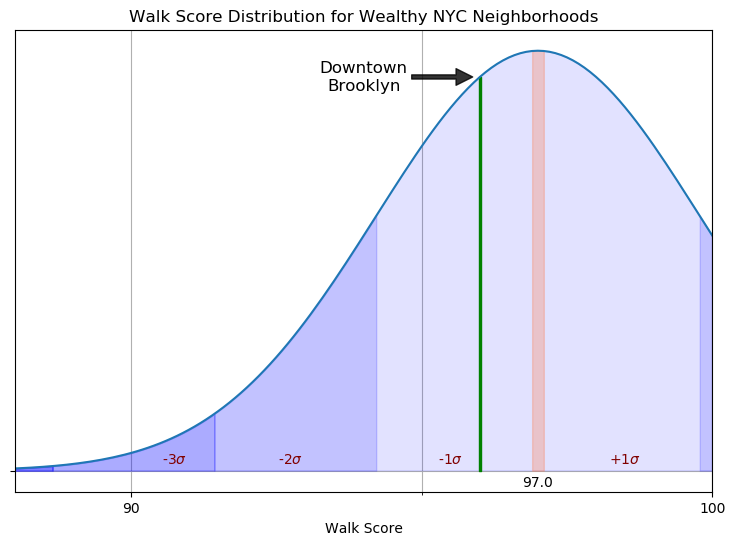

The Walk Score for Wealthy NYC neighborhoods is 97.00 with a standard deviation of 2.78 and an error of 0.98


In [7]:
mu_R = np.mean(R)
sigma_R = np.std(R)
Err_R = sigma_R/(np.sqrt(np.count_nonzero(R)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_R,sigma_R)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_R - .1, mu_R + .1) 
y2 = norm.pdf(x1,mu_R,sigma_R)

# dist(+/-) the walkscore
x2 = np.linspace(96-.020, 96+.020)
y3 = norm.pdf(x2,mu_R,sigma_R)
dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_R - sigma_R, mu_R + sigma_R)
yoms = norm.pdf(xoms,mu_R,sigma_R)

# 2 std left of mean
xtsdl = np.linspace(mu_R - 2 * sigma_R, mu_R - 1*sigma_R)
ytsdl = norm.pdf(xtsdl, mu_R, sigma_R)

# 2 std right of mean
xtsdr = np.linspace(mu_R + 2 * sigma_R, mu_R + 1*sigma_R)
ytsdr = norm.pdf(xtsdr, mu_R, sigma_R)

# 3 std left of mean
xhsdl = np.linspace(mu_R - 3 * sigma_R, mu_R - 2*sigma_R)
yhsdl = norm.pdf(xhsdl, mu_R, sigma_R)

# 4std left of mean
xfsdl = np.linspace(mu_R - 4 * sigma_R, mu_R - 3*sigma_R)
yfsdl = norm.pdf(xfsdl, mu_R, sigma_R)

#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_R), xy=(mu_R, -0.0015), ha='center', va='top') 
ax.annotate('Downtown\nBrooklyn',
            xy = (95.9, dtb), #streamline the y prt. arrays don't work here 
            xytext = (94, dtb), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'center'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(95.5,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(92.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(90.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(98.5,0.0015), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.fill_between(x2, dtb, 0, alpha = 1, color = 'g') #Downtown Brooklyn
ax.set_xlim([88,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Wealthy NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Wealthy NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Wealthy NYC neighborhoods is", 
      "{:.2f}".format(round(mu_R,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_R,2)),
      "and an error of",
      "{:.2f}".format(round(Err_R,2))
     )

## Test

* aggregate all walk score date and all neighborhoods studied and place them onto one distribution. ax.fill for each neighborhoods should be a different color
    * possible go back and change the colors of the neighborhoods to match this colors

In [9]:
a = np.array([100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,97,97,97,97,
97,97,97,97,97,97,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,93,93,
93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,91,91,91,91,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,88,88,88,
88,88,88,88,88,88,88,87,86,85,85,84,84,84,84,84,84,83,83,83,83,83,82,82,82,82,82,82,81,81,81,80,79,79,79,79,79,79,79,78,
78,77,77,77,77,77,77,76,76,76,76,75,75,75,75,75,74,74,74,74,74,73,73,72,72,72,71,71,71,71,71,70,70,70,70,68,68,68,67,67,
66,66,66,66,66,65,65,65,65,64,64,64,63,63,63,63,62,61,61,59,59,58,57,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,
44,44,41,40,39,39,38,37,35,27,4,])
a

array([100, 100, 100, 100, 100, 100, 100, 100, 100,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,
        98,  98,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  96,
        96,  96,  96,  96,  96,  96,  96,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  94,  94,  94,
        94,  94,  94,  94,  94,  93,  93,  93,  93,  93,  93,  93,  93,
        93,  93,  93,  93,  92,  92,  92,  92,  92,  92,  92,  91,  91,
        91,  91,  90,  90,  90,  90,  90,  90,  90,  90,  89,  89,  89,
        89,  89,  89,  89,  89,  88,  88,  88,  88,  88,  88,  88,  88,
        88,  88,  87,  86,  85,  85,  84,  84,  84,  84,  84,  84,  83,
        83,  83,  83,  83,  82,  82,  82,  82,  82,  82,  81,  81,  81,
        80,  79,  79,  79,  79,  79,  79,  79,  78,  78,  77,  77,  77,
        77,  77,  77,  76,  76,  76,  76,  75,  75,  75,  75,  75,  74,
        74,  74,  74,  74,  73,  73,  72,  72,  72,  71,  71,  7

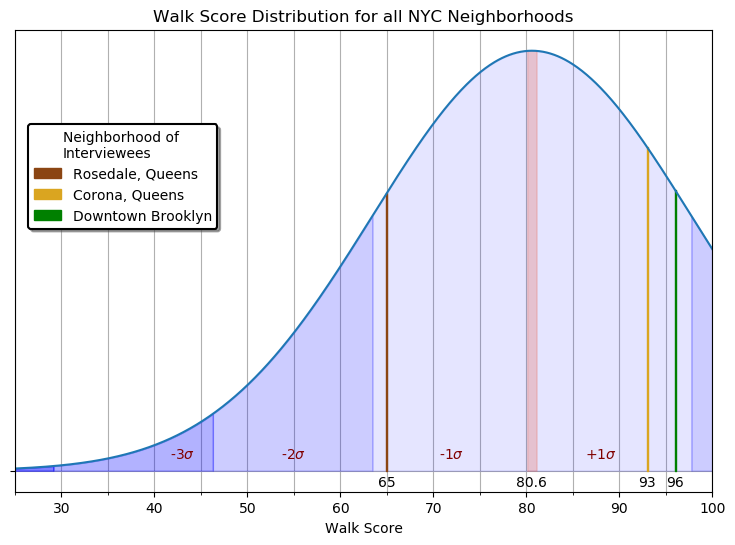

The Walk Score for all NYC neighborhoods is 80.60 with a standard deviation of 17.15 and an error of 1.10


In [10]:
mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .5, mu_a + .5) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax.annotate("96", xy=(96,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax.fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax.fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax.fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

leg = plt.legend(handles = [Rosedale, Corona, DTB], 
                 title = 'Neighborhood of \nInterviewees',
                 loc = 'upper left', 
                 bbox_to_anchor = (.009,.81),
                 fancybox = True,
                 shadow = True
                )
leg.get_frame().set_linewidth(1.5)
leg.get_frame().set_edgecolor("k")

ax.set_xlim([25,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for all NYC Neighborhoods')

plt.savefig('Walk Score Distribution for all NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

print("The Walk Score for all NYC neighborhoods is", 
      "{:.2f}".format(round(mu_a,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_a,2)),
      "and an error of",
      "{:.2f}".format(round(Err_a,2))
     )

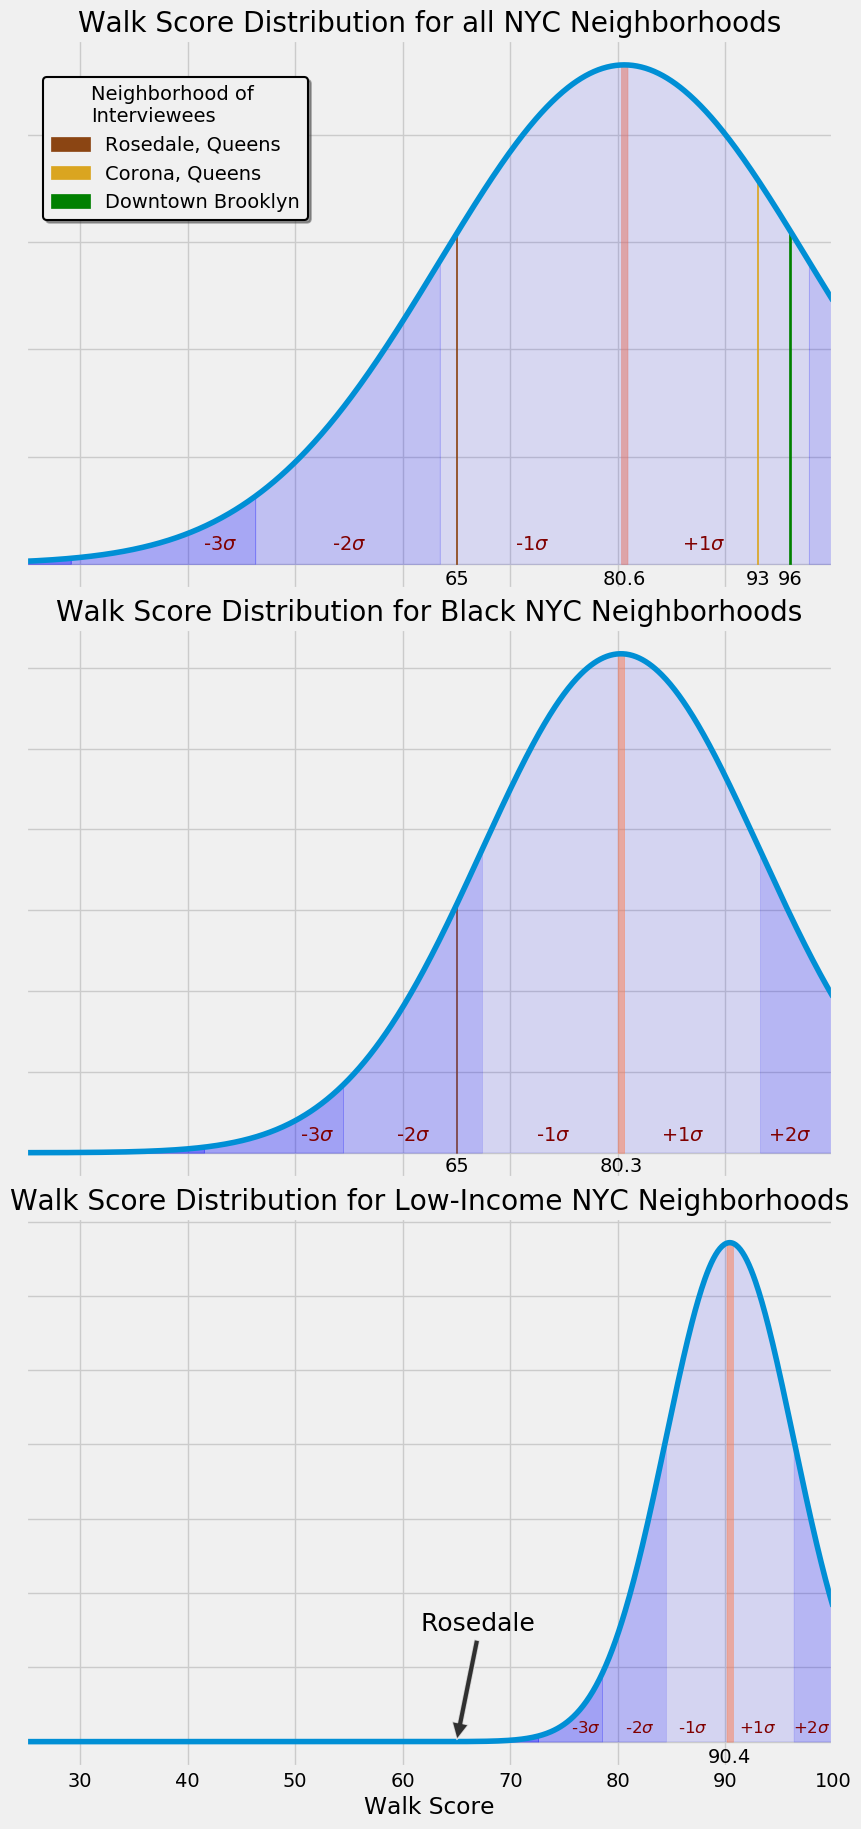

In [20]:
plt.style.use('fivethirtyeight')
#plt.style.use('default')
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (9,18))
plt.tight_layout()

mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))
mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))
mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .3, mu_a + .3) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax[0].annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax[0].annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax[0].annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax[0].annotate("96", xy=(96,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax[0].annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

#ax[0].set_xticks(np.arange(0, 101, 10)) 
#ax[0].set_xticks(np.arange(0, 96, 5), minor=True) 
#ax[0].set_yticks(np.arange(0, 1, 10))
#ax[0].set_yticks(np.arange(0, 1, 20), minor=True)
#ax[0].set_axisbelow(True)
#ax[0].grid(which='minor', alpha=1)
#ax[0].grid(which='major', alpha=1)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0].fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax[0].fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax[0].fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax[0].fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax[0].fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax[0].fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax[0].fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax[0].fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

leg = plt.legend(handles = [Rosedale, Corona, DTB], 
                 title = 'Neighborhood of \nInterviewees',
                 loc = 'upper left', 
                 bbox_to_anchor = (.009,.95),
                 bbox_transform=ax[0].transAxes,
                 fancybox = True,
                 shadow = True
                )
leg.get_frame().set_linewidth(1.5)
leg.get_frame().set_edgecolor("k")


ax[0].set_xlim([25,100])
ax[0].set_yticklabels([])
ax[0].set_title('Walk Score Distribution for all NYC Neighborhoods')
ax[0].plot(x,y)

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .3, mu_b + .3) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax[1].annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
ax[1].annotate("65", xy=(65,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax[1].annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

#ax[1].set_xticks(np.arange(0, 101, 10)) 
#ax[1].set_xticks(np.arange(0, 96, 5), minor=True) 
#ax[1].set_yticks(np.arange(0, 1, 10))
#ax[1].set_yticks(np.arange(0, 1, 20), minor=True)
#ax[1].set_axisbelow(True)
#ax[1].grid(which='minor', alpha=1)
#ax[1].grid(which='major', alpha=1)

ax[1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1].fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax[1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax[1].set_xlim([25,100])
ax[1].set_yticklabels([])
ax[1].set_title('Walk Score Distribution for Black NYC Neighborhoods')
ax[1].plot(x,y)

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .3, mu_l + .3) 
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
ax[2].plot(x,y)

ax[2].annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax[2].annotate('Rosedale',
               xy = (65,0), 
               xytext = (67,0.015), 
               arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
               fontsize = 18,
               ha='center'
              )

# Annotate 1,2,3 STD +/- the mean
ax[2].annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)

#ax[2].set_xticks(np.arange(0, 101, 10)) 
#ax[2].set_xticks(np.arange(0, 96, 5), minor=True) 
#ax[2].set_yticks(np.arange(0, 1, 10))
#ax[2].set_yticks(np.arange(0, 1, 20), minor=True)
#ax[2].set_axisbelow(True)
#ax[2].grid(which='minor', alpha=1)
#ax[2].grid(which='major', alpha=1)

ax[2].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[2].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[2].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[2].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[2].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[2].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[2].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[2].set_xlim([25,100])
ax[2].set_xlabel('Walk Score')
ax[2].set_yticklabels([])
ax[2].set_title('Walk Score Distribution for Low-Income NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for All, Black, and Low-Income NYC Neighborhoods', dpi = 90, bbox_inches='tight')

# ALTERNATE PLOTTING STYLE

 # ACTION PLAN
 * ~~Plot error bounds with the normal distributions of each plot~~ Not currently possible
 * Major axis for x and y should be as close to a square as possible

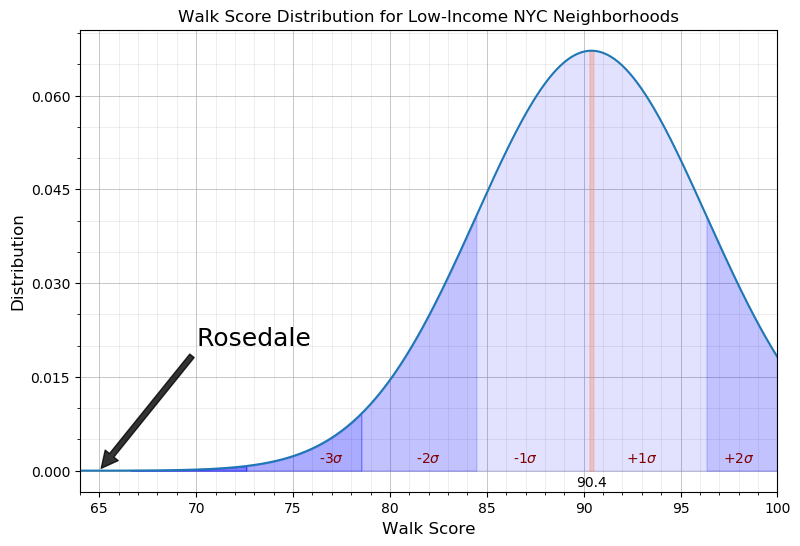

The Walk Score for Low-Income NYC neighborhoods is 90.40 with a standard deviation of 5.94 and an error of 1.19


In [9]:
l = np.array([96,96,95,95,95,95,94,94,94,94,93,93,93,92,92,90,89,89,89,88,88,85,83,77,71])

mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .1, mu_l + .1) 
#x1 = np.linspace(mu_l - Err_l, mu_l + Err_l)
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)
#ax.plot(Ue,y)

ax.annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax.annotate('Rosedale',
            xy = (65,0), 
            xytext = (70,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 5)) 
ax.set_xticks(np.arange(0, 101, 1), minor=True) 
ax.set_yticks(np.arange(0, .07, .015))
ax.set_yticks(np.arange(0, .07, .005), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=.3, lw=0.5)
ax.grid(which='major', alpha=1, lw=0.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([64,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Low-Income NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Low-Income NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Low-Income NYC neighborhoods is", 
      "{:.2f}".format(round(mu_l,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_l,2)),
      "and an error of",
      "{:.2f}".format(round(Err_l,2))
     )

## Black Neighborhoods
* Axis grid looks good

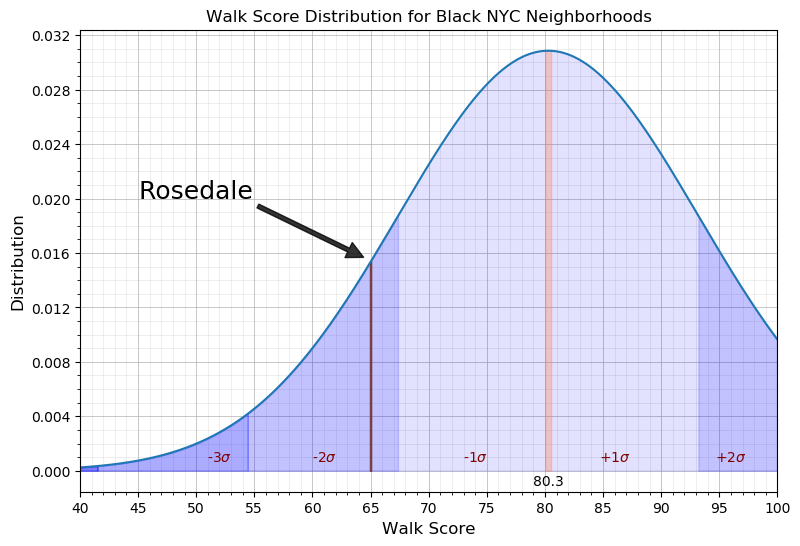

The Walk Score for Black NYC neighborhoods is 80.29 with a standard deviation of 12.93 and an error of 1.99


In [7]:
b = np.array([97,97,97,97,96,95,94,93,90,90,89,88,88,88,88,87,84,84,84,82,81,81,79,79,78,77,76,76,75,75,74,74,73,71,70,
              70,68,68,66,65,61,27,])

mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .25, mu_b + .25) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
#ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate('Rosedale',
            xy = (64.6,0.0156), #streamline the y prt 
            xytext = (45,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 5)) 
ax.set_xticks(np.arange(0, 101, 1), minor=True) 
ax.set_yticks(np.arange(0, .04, .004))
ax.set_yticks(np.arange(0, .04, .001), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=.3, lw=.5)
ax.grid(which='major', alpha=1, lw=.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.set_xlim([40,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Black NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Black NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Black NYC neighborhoods is", 
      "{:.2f}".format(round(mu_b,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_b,2)),
      "and an error of",
      "{:.2f}".format(round(Err_b,2))
     )

## WHITE NEIGHBORHOODS
* Fix dtb text so that it's inside the frame
* Axis grid looks good

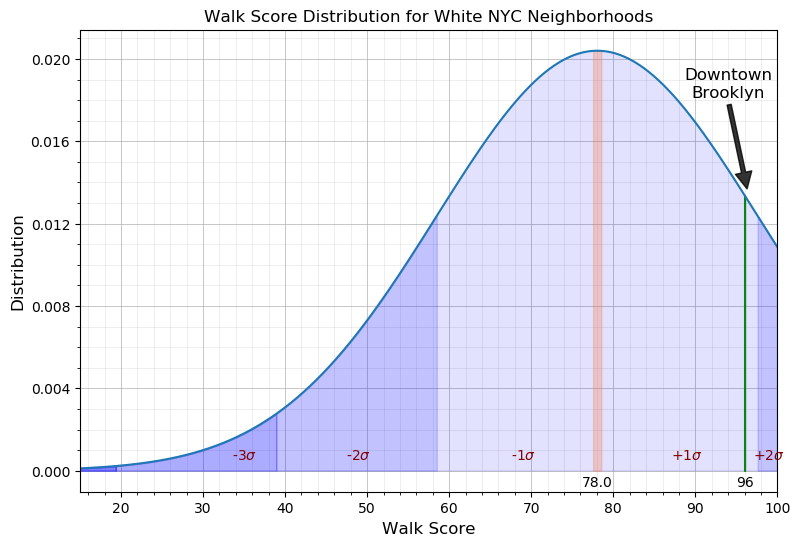

The Walk Score for White NYC neighborhoods is 78.04 with a standard deviation of 19.56 and an error of 1.61


In [6]:
W = np.array([100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,97,97,97,97,97,97,97,
96,96,96,96,95,95,95,95,95,95,95,95,94,93,93,93,93,93,93,93,93,92,91,91,91,90,90,90,90,90,89,89,89,88,88,88,86,85,84,
84,83,83,82,82,82,82,80,79,79,79,79,77,77,77,77,75,75,74,74,72,72,72,71,71,71,70,70,70,68,67,67,66,66,66,65,65,65,64,
64,64,63,63,63,63,62,61,59,59,58,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,44,44,41,40,39,39,38,37,35,4,])
W

mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
#dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_W), xy=(mu_W, -.00025), ha='center', va='top') 
ax.annotate("96", xy=(96,-.00025), ha='center', va='top')
ax.annotate('Downtown\nBrooklyn',
            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
            xytext = (94,0.0180), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 101, 2), minor=True) 
ax.set_yticks(np.arange(0, .025, .004))
ax.set_yticks(np.arange(0, .025, .001), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3, lw=.5)
ax.grid(which='major', alpha=1, lw=.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([15,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for White NYC Neighborhoods')


#plt.savefig('Walk Score Distribution for White NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for White NYC neighborhoods is", 
      "{:.2f}".format(round(mu_W,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_W,2)),
      "and an error of",
      "{:.2f}".format(round(Err_W,2))
     )

## Minority Neighborhoods

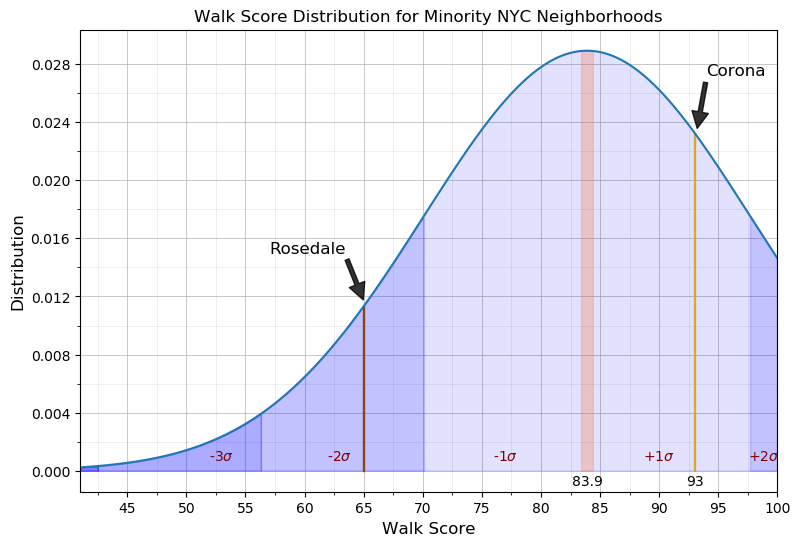

The Walk Score for minority NYC neighborhoods is 83.89 with a standard deviation of 13.79 and an error of 1.35


In [5]:
M = np.array([97,97,97,97,97,96,96,96,96,96,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,93,93,93,93,93,92,92,92,
92,92,92,91,90,90,90,90,90,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,87,85,84,84,84,84,83,83,83,82,82,82,81,81,81,
79,79,79,78,78,77,77,76,76,76,75,75,75,74,74,74,73,73,71,71,70,70,68,68,66,65,61,57,52,27,4])

mu_M = np.mean(M)
sigma_M = np.std(M)
Err_M = sigma_M/(np.sqrt(np.count_nonzero(M)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_M,sigma_M)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_M - .5, mu_M + .5) 
y2 = norm.pdf(x1,mu_M,sigma_M)

# dist(+/-) the walkscore
xC = np.linspace(93 - .05, 93 + .05)
xR = np.linspace(65 - .05, 65 + .05)
cor = norm(mu_M,sigma_M).pdf(93)
ros = norm(mu_M,sigma_M).pdf(65)

# plotting percentile shading
xoms = np.linspace(mu_M - sigma_M, mu_M + sigma_M)
yoms = norm.pdf(xoms,mu_M,sigma_M)

# 2 std left of mean
xtsdl = np.linspace(mu_M - 2 * sigma_M, mu_M - 1*sigma_M)
ytsdl = norm.pdf(xtsdl, mu_M, sigma_M)

# 2 std right of mean
xtsdr = np.linspace(mu_M + 2 * sigma_M, mu_M + 1*sigma_M)
ytsdr = norm.pdf(xtsdr, mu_M, sigma_M)

# 3 std left of mean
xhsdl = np.linspace(mu_M - 3 * sigma_M, mu_M - 2*sigma_M)
yhsdl = norm.pdf(xhsdl, mu_M, sigma_M)

# 4std left of mean
xfsdl = np.linspace(mu_M - 4 * sigma_M, mu_M - 3*sigma_M)
yfsdl = norm.pdf(xfsdl, mu_M, sigma_M)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_M), xy=(mu_M, -0.00025), ha='center', va='top')
#ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax.annotate('Corona',
            xy = (93.2,0.0235), 
            xytext = (96.5,0.027), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )
ax.annotate('Rosedale',
            xy = (65,0.0117), #streamline the y prt 
            xytext = (57,0.015), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(77,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(63,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(90,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(97.5,0.0005), ha='left', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 5)) 
ax.set_xticks(np.arange(0, 101, 2.5), minor=True) 
ax.set_yticks(np.arange(0, .03, .004))
ax.set_yticks(np.arange(0, .03, .002), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3, lw=.5)
ax.grid(which='major', alpha=1, lw=.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.fill_between(xC, cor, 0, alpha = .9, color = 'goldenrod') #Corona
ax.fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown') #Rosedale 

ax.set_xlim([41,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Minority NYC Neighborhoods')

# REDARY TO SAVE - DELETE THIS AFTER SAVING
#plt.savefig('Walk Score Distribution for Minority NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for minority NYC neighborhoods is", 
      "{:.2f}".format(round(mu_M,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_M,2)),
      "and an error of",
      "{:.2f}".format(round(Err_M,2))
     )

## Wealthy Neighborhoods

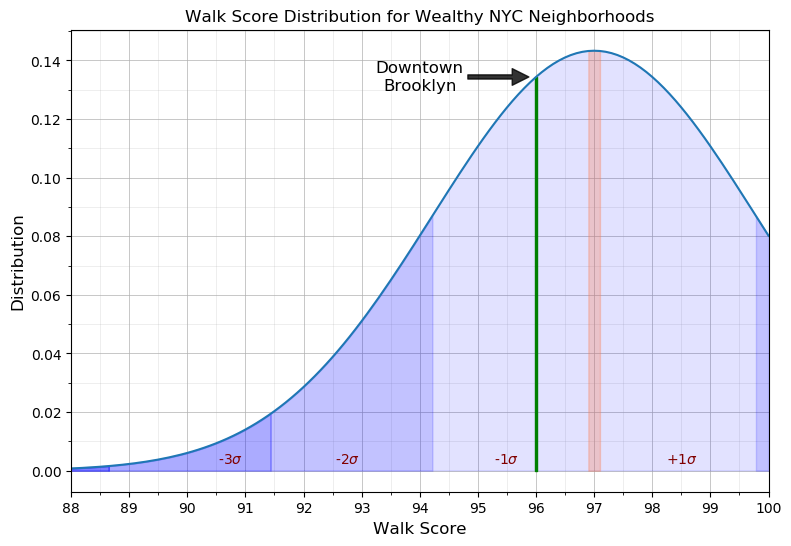

The Walk Score for Wealthy NYC neighborhoods is 97.00 with a standard deviation of 2.78 and an error of 0.98


In [4]:
R = np.array([100,99,99,99,97,96,95,91])

mu_R = np.mean(R)
sigma_R = np.std(R)
Err_R = sigma_R/(np.sqrt(np.count_nonzero(R)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_R,sigma_R)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_R - .1, mu_R + .1) 
y2 = norm.pdf(x1,mu_R,sigma_R)

# dist(+/-) the walkscore
x2 = np.linspace(96-.020, 96+.020)
y3 = norm.pdf(x2,mu_R,sigma_R)
dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_R - sigma_R, mu_R + sigma_R)
yoms = norm.pdf(xoms,mu_R,sigma_R)

# 2 std left of mean
xtsdl = np.linspace(mu_R - 2 * sigma_R, mu_R - 1*sigma_R)
ytsdl = norm.pdf(xtsdl, mu_R, sigma_R)

# 2 std right of mean
xtsdr = np.linspace(mu_R + 2 * sigma_R, mu_R + 1*sigma_R)
ytsdr = norm.pdf(xtsdr, mu_R, sigma_R)

# 3 std left of mean
xhsdl = np.linspace(mu_R - 3 * sigma_R, mu_R - 2*sigma_R)
yhsdl = norm.pdf(xhsdl, mu_R, sigma_R)

# 4std left of mean
xfsdl = np.linspace(mu_R - 4 * sigma_R, mu_R - 3*sigma_R)
yfsdl = norm.pdf(xfsdl, mu_R, sigma_R)

#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#ax.annotate("{:.1f}".format(mu_R), xy=(mu_R, -0.0015), ha='center', va='top') 
ax.annotate('Downtown\nBrooklyn',
            xy = (95.9, dtb), #streamline the y prt. arrays don't work here 
            xytext = (94, dtb), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'center'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(95.5,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(92.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(90.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(98.5,0.0015), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 1)) 
ax.set_xticks(np.arange(0, 101, .5), minor=True) 
ax.set_yticks(np.arange(0, .2, .02))
ax.set_yticks(np.arange(0, .2, .01), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3, lw=.5)
ax.grid(which='major', alpha=1, lw=.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.fill_between(x2, dtb, 0, alpha = 1, color = 'g') #Downtown Brooklyn
ax.set_xlim([88,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Wealthy NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Wealthy NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()
print("The Walk Score for Wealthy NYC neighborhoods is", 
      "{:.2f}".format(round(mu_R,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_R,2)),
      "and an error of",
      "{:.2f}".format(round(Err_R,2))
     )

# All Neighborhoods
* Move legend down and right

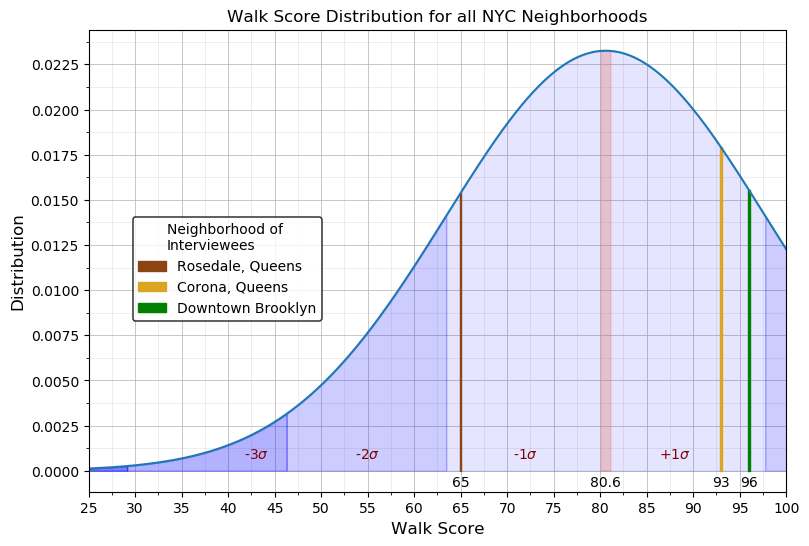

The Walk Score for all NYC neighborhoods is 80.60 with a standard deviation of 17.15 and an error of 1.10


In [3]:
a = np.array([100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,97,97,97,97,
97,97,97,97,97,97,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,93,93,
93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,91,91,91,91,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,88,88,88,
88,88,88,88,88,88,88,87,86,85,85,84,84,84,84,84,84,83,83,83,83,83,82,82,82,82,82,82,81,81,81,80,79,79,79,79,79,79,79,78,
78,77,77,77,77,77,77,76,76,76,76,75,75,75,75,75,74,74,74,74,74,73,73,72,72,72,71,71,71,71,71,70,70,70,70,68,68,68,67,67,
66,66,66,66,66,65,65,65,65,64,64,64,63,63,63,63,62,61,61,59,59,58,57,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,
44,44,41,40,39,39,38,37,35,27,4,])

mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .5, mu_a + .5) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax.annotate("96", xy=(96,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 5)) 
ax.set_xticks(np.arange(0, 101, 2.5), minor=True) 
ax.set_yticks(np.arange(0, .025, .0025))
ax.set_yticks(np.arange(0, .025, .00125), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.3, lw=.5)
ax.grid(which='major', alpha=1, lw=.5)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax.fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax.fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax.fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

leg = plt.legend(handles = [Rosedale, Corona, DTB], 
                 title = 'Neighborhood of \nInterviewees',
                 loc = 'upper left', 
                 bbox_to_anchor = (.053,.61),
                 fancybox = True,
                 #shadow = True
                )
leg.get_frame().set_linewidth(1.1)
leg.get_frame().set_edgecolor("k")

ax.set_xlim([25,100])
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
#ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for all NYC Neighborhoods')

plt.savefig('Walk Score Distribution for all NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

print("The Walk Score for all NYC neighborhoods is", 
      "{:.2f}".format(round(mu_a,2)),
      "with a standard deviation of", 
      "{:.2f}".format(round(sigma_a,2)),
      "and an error of",
      "{:.2f}".format(round(Err_a,2))
     )


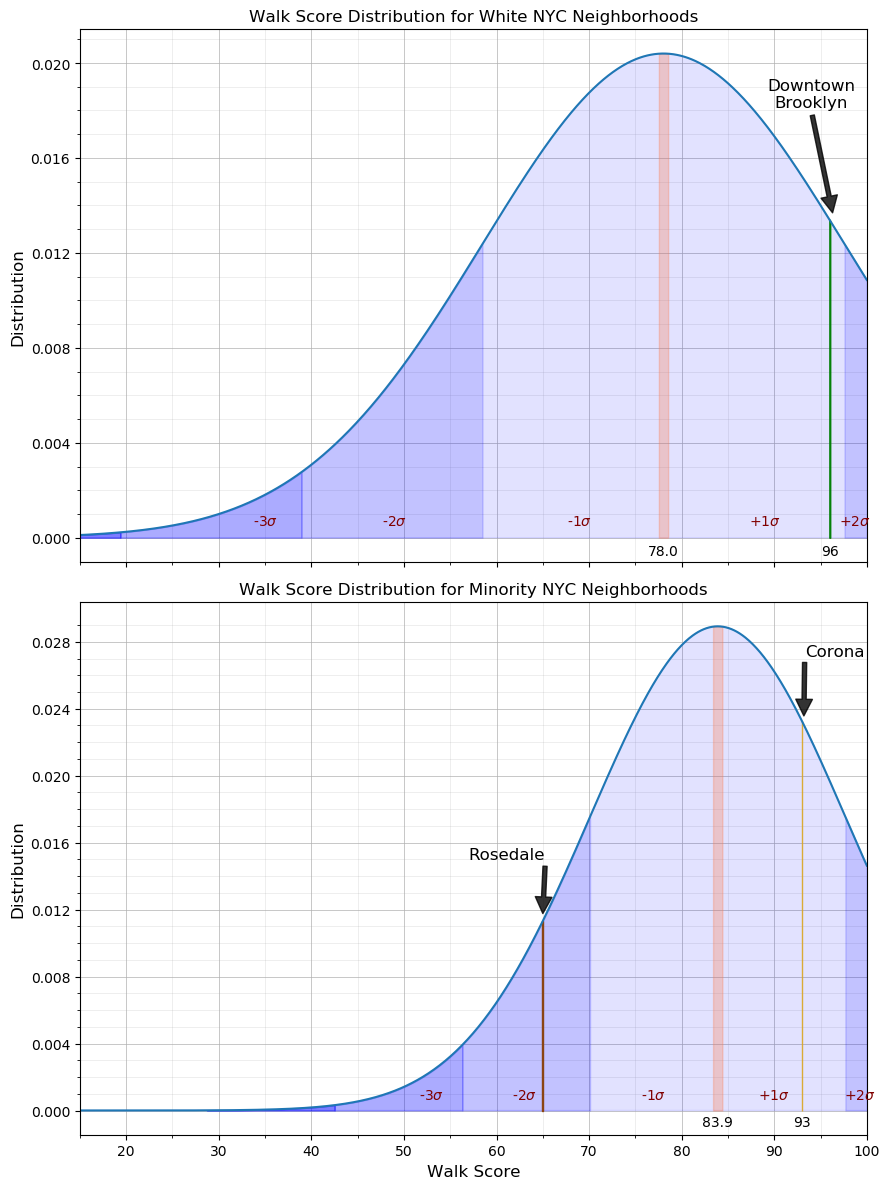

In [215]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (9,12))

mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
#dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
ax[0].plot(x,y)

ax[0].annotate("{:.1f}".format(mu_W), xy=(mu_W, -.00025), ha='center', va='top') 
ax[0].annotate("96", xy=(96,-.00025), ha='center', va='top')
ax[0].annotate('Downtown\nBrooklyn',
            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
            xytext = (94,0.0180), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax[0].annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
ax[0].annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax[0].set_xticks(np.arange(0, 101, 10)) 
ax[0].set_xticks(np.arange(0, 101, 5), minor=True) 
ax[0].set_yticks(np.arange(0, .025, .004))
ax[0].set_yticks(np.arange(0, .025, .001), minor=True)
ax[0].set_axisbelow(True)
ax[0].grid(which='minor', alpha=0.3, lw=.5)
ax[0].grid(which='major', alpha=1, lw=.5)

ax[0].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0].fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax[0].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[0].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[0].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[0].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[0].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[0].set_xlim([15,100])
#ax[0].set_xlabel('Walk Score', fontsize=12)
ax[0].set_ylabel('Distribution', fontsize=12)
ax[0].set_title('Walk Score Distribution for White NYC Neighborhoods')


############################################# MINORITY NEIGHBORHOODS ################################################


mu_M = np.mean(M)
sigma_M = np.std(M)
Err_M = sigma_M/(np.sqrt(np.count_nonzero(M)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_M,sigma_M)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_M - .5, mu_M + .5) 
y2 = norm.pdf(x1,mu_M,sigma_M)

# dist(+/-) the walkscore
xC = np.linspace(93 - .05, 93 + .05)
xR = np.linspace(65 - .05, 65 + .05)
cor = norm(mu_M,sigma_M).pdf(93)
ros = norm(mu_M,sigma_M).pdf(65)

# plotting percentile shading
xoms = np.linspace(mu_M - sigma_M, mu_M + sigma_M)
yoms = norm.pdf(xoms,mu_M,sigma_M)

# 2 std left of mean
xtsdl = np.linspace(mu_M - 2 * sigma_M, mu_M - 1*sigma_M)
ytsdl = norm.pdf(xtsdl, mu_M, sigma_M)

# 2 std right of mean
xtsdr = np.linspace(mu_M + 2 * sigma_M, mu_M + 1*sigma_M)
ytsdr = norm.pdf(xtsdr, mu_M, sigma_M)

# 3 std left of mean
xhsdl = np.linspace(mu_M - 3 * sigma_M, mu_M - 2*sigma_M)
yhsdl = norm.pdf(xhsdl, mu_M, sigma_M)

# 4std left of mean
xfsdl = np.linspace(mu_M - 4 * sigma_M, mu_M - 3*sigma_M)
yfsdl = norm.pdf(xfsdl, mu_M, sigma_M)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
ax[1].plot(x,y)

ax[1].annotate("{:.1f}".format(mu_M), xy=(mu_M, -0.00025), ha='center', va='top')
ax[1].annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax[1].annotate('Corona',
            xy = (93.2,0.0235), 
            xytext = (96.5,0.027), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )
ax[1].annotate('Rosedale',
            xy = (65,0.0117), #streamline the y prt 
            xytext = (57,0.015), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
           )

# Annotate 1,2,3 STD +/- the mean
ax[1].annotate("-1$\sigma$", xy=(77,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-2$\sigma$", xy=(63,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+1$\sigma$", xy=(90,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+2$\sigma$", xy=(97.5,0.0005), ha='left', va='bottom', color='maroon')

ax[1].set_xticks(np.arange(0, 101, 10)) 
ax[1].set_xticks(np.arange(0, 101, 5), minor=True) 
ax[1].set_yticks(np.arange(0, .03, .004))
ax[1].set_yticks(np.arange(0, .03, .001), minor=True)
ax[1].set_axisbelow(True)
ax[1].grid(which='minor', alpha=0.3, lw=.5)
ax[1].grid(which='major', alpha=1, lw=.5)

ax[1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[1].fill_between(xC, cor, 0, alpha = .9, color = 'goldenrod') #Corona
ax[1].fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown') #Rosedale 

ax[1].set_xlim([15,100])
ax[1].set_xlabel('Walk Score', fontsize=12)
ax[1].set_ylabel('Distribution', fontsize=12)
ax[1].set_title('Walk Score Distribution for Minority NYC Neighborhoods')

plt.subplots_adjust(hspace=0)
plt.tight_layout()
#plt.savefig('Walk Score Distribution for Minority NYC Neighborhoods', dpi = 90, bbox_inches='tight')

Text(0.5, 1, 'Walk Score Distribution for Low-Income NYC Neighborhoods')

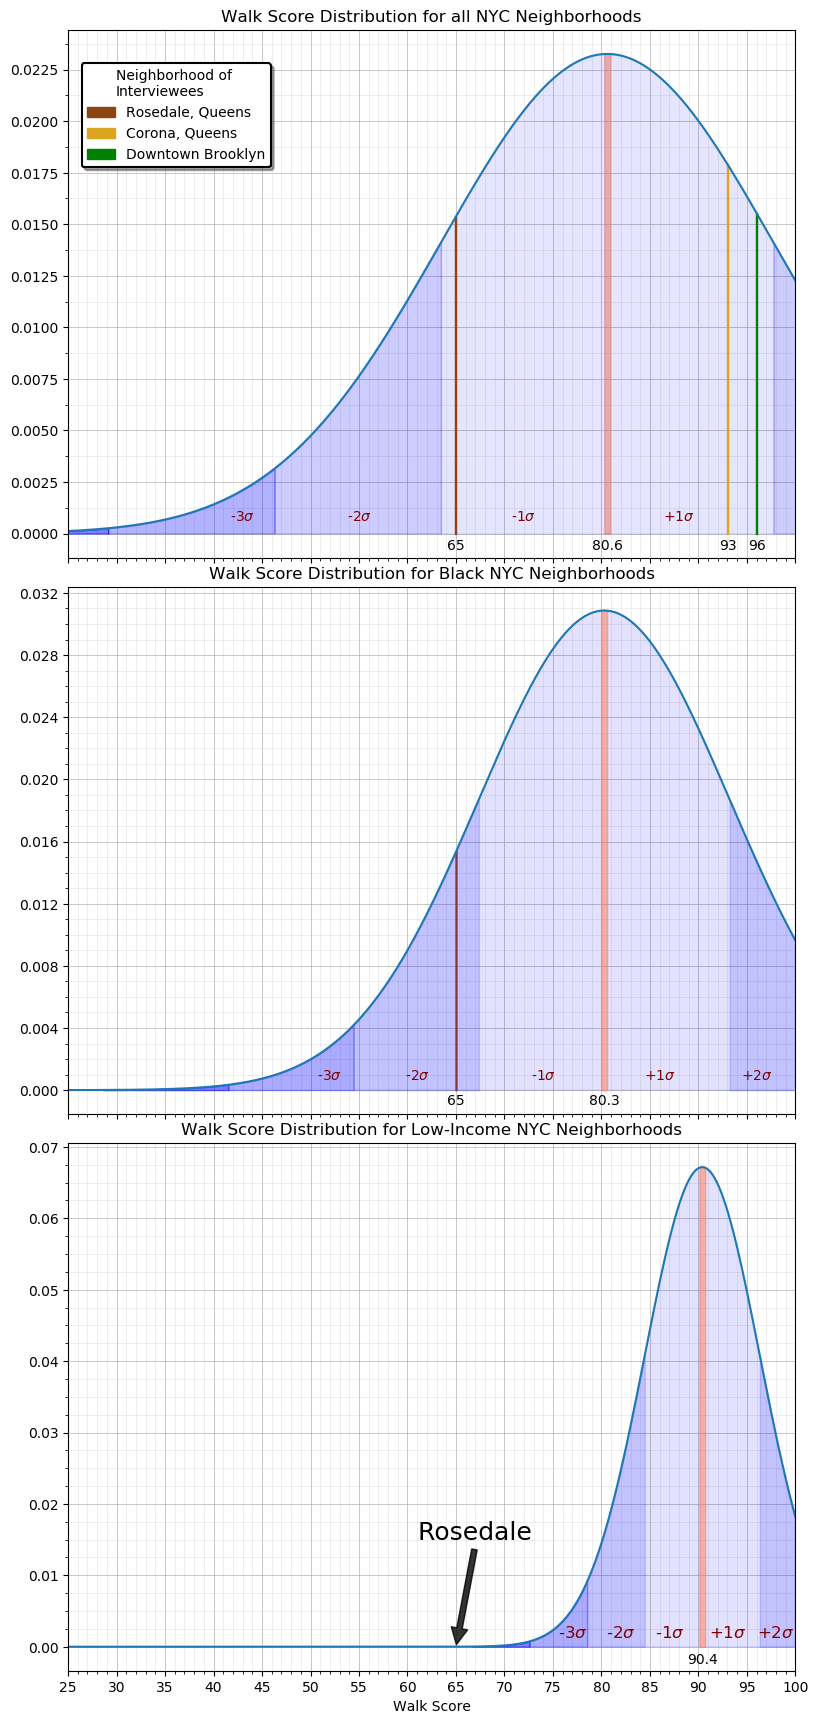

In [226]:
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (8,17))
plt.tight_layout()

mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))
mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))
mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .3, mu_a + .3) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax[0].annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax[0].annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax[0].annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax[0].annotate("96", xy=(96,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax[0].annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
ax[0].annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

ax[0].set_xticks(np.arange(0, 101, 5)) 
ax[0].set_xticks(np.arange(0, 101, 2.5), minor=True) 
ax[0].set_yticks(np.arange(0, .025, .0025))
ax[0].set_yticks(np.arange(0, .025, .00125), minor=True)
ax[0].set_axisbelow(True)
ax[0].grid(which='minor', alpha=0.3, lw=.5)
ax[0].grid(which='major', alpha=1, lw=.5)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0].fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax[0].fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax[0].fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax[0].fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax[0].fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax[0].fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax[0].fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax[0].fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

leg = plt.legend(handles = [Rosedale, Corona, DTB], 
                 title = 'Neighborhood of \nInterviewees',
                 loc = 'upper left', 
                 bbox_to_anchor = (.009,.95),
                 bbox_transform=ax[0].transAxes,
                 fancybox = True,
                 shadow = True
                )
leg.get_frame().set_linewidth(1.5)
leg.get_frame().set_edgecolor("k")


ax[0].set_xlim([25,100])
#ax[0].set_yticklabels([])
ax[0].set_title('Walk Score Distribution for all NYC Neighborhoods')
ax[0].plot(x,y)

#####################################################################################################################

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .3, mu_b + .3) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax[1].annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
ax[1].annotate("65", xy=(65,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax[1].annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
ax[1].annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

ax[1].set_xticks(np.arange(0, 101, 5)) 
ax[1].set_xticks(np.arange(0, 101, 1), minor=True) 
ax[1].set_yticks(np.arange(0, .04, .004))
ax[1].set_yticks(np.arange(0, .04, .001), minor=True)
ax[1].set_axisbelow(True)
ax[1].grid(which='minor', alpha=.3, lw=.5)
ax[1].grid(which='major', alpha=1, lw=.5)

ax[1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1].fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax[1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax[1].set_xlim([25,100])
#ax[1].set_yticklabels([])
ax[1].set_title('Walk Score Distribution for Black NYC Neighborhoods')
ax[1].plot(x,y)

#####################################################################################################################

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .3, mu_l + .3) 
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
ax[2].plot(x,y)

ax[2].annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax[2].annotate('Rosedale',
               xy = (65,0), 
               xytext = (67,0.015), 
               arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
               fontsize = 18,
               ha='center'
              )

# Annotate 1,2,3 STD +/- the mean
ax[2].annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)
ax[2].annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon', fontsize=12)

ax[2].set_xticks(np.arange(0, 101, 5)) 
ax[2].set_xticks(np.arange(0, 101, 1), minor=True) 
ax[2].set_yticks(np.arange(0, .07, .010))
ax[2].set_yticks(np.arange(0, .07, .0025), minor=True)
ax[2].set_axisbelow(True)
ax[2].grid(which='minor', alpha=.3, lw=0.5)
ax[2].grid(which='major', alpha=1, lw=0.5)

ax[2].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[2].fill_between(x1, y2, 0, alpha = 0.5, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[2].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[2].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[2].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[2].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[2].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[2].set_xlim([25,100])
ax[2].set_xlabel('Walk Score')
#ax[2].set_yticklabels([])
ax[2].set_title('Walk Score Distribution for Low-Income NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for All, Black, and Low-Income NYC Neighborhoods', dpi = 90, bbox_inches='tight')

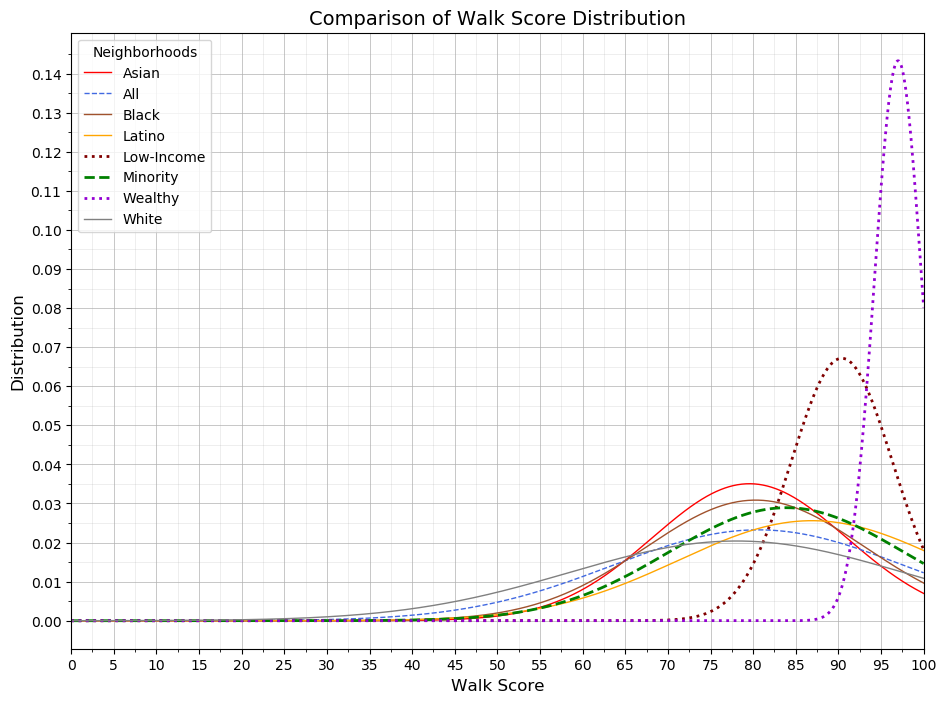

In [89]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (11,8))

mu_A = np.mean(A)
sigma_A = np.std(A)
Err_A = sigma_A/(np.sqrt(np.count_nonzero(A)))
mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))
mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))
mu_H = np.mean(H)
sigma_H = np.std(H)
Err_H = sigma_H/(np.sqrt(np.count_nonzero(H)))
mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))
mu_M = np.mean(M)
sigma_M = np.std(M)
Err_M = sigma_M/(np.sqrt(np.count_nonzero(M)))
mu_R = np.mean(R)
sigma_R = np.std(R)
Err_R = sigma_R/(np.sqrt(np.count_nonzero(R)))
mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y_A = norm.pdf(x,mu_A,sigma_A)
y_a = norm.pdf(x,mu_a,sigma_a)
y_b = norm.pdf(x,mu_b,sigma_b)
y_H = norm.pdf(x,mu_H,sigma_H)
y_l = norm.pdf(x,mu_l,sigma_l)
y_M = norm.pdf(x,mu_M,sigma_M)
y_R = norm.pdf(x,mu_R,sigma_R)
y_W = norm.pdf(x,mu_W,sigma_W)

y_mu_A = norm.pdf(x_mu_A,mu_A,sigma_A)
y_mu_a = norm.pdf(x_mu_a,mu_a,sigma_a)
y_mu_b = norm.pdf(x_mu_b,mu_b,sigma_b)
y_mu_H = norm.pdf(x_mu_H,mu_H,sigma_H)
y_mu_l = norm.pdf(x_mu_l,mu_l,sigma_l)
y_mu_M = norm.pdf(x_mu_M,mu_M,sigma_M)
y_mu_R = norm.pdf(x_mu_R,mu_R,sigma_R)
y_mu_W = norm.pdf(x_mu_W,mu_W,sigma_W)

plt.plot(x, y_A, color='r', linewidth=1, label = 'Asian')
plt.plot(x, y_a, color='royalblue', linewidth=1, linestyle='--', label = 'All')
plt.plot(x, y_b, color='sienna', linewidth=1, label = 'Black')
plt.plot(x, y_H, color='orange', linewidth=1, label = 'Latino')
plt.plot(x, y_l, color='maroon', linewidth=2, linestyle=':', label = 'Low-Income')
plt.plot(x, y_M, color='g', linewidth=2, linestyle='dashed', label = 'Minority')
plt.plot(x, y_R, color='darkviolet', linewidth=2, linestyle=':',label = 'Wealthy')
plt.plot(x, y_W, color='gray', linewidth=1, label = 'White')

ax.set_xticks(np.arange(0, 101, 5)) 
ax.set_xticks(np.arange(0, 101, 2.5), minor=True) 
ax.set_yticks(np.arange(0, .15, .01))
ax.set_yticks(np.arange(0, .15, .005), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=.3, lw=0.5)
ax.grid(which='major', alpha=1, lw=0.5)
ax.set_xlabel('Walk Score', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
ax.legend(title='Neighborhoods')
ax.set_title('Comparison of Walk Score Distribution', fontsize=14)

ax.set_xlim([0,100])

plt.show()